In [2]:
import os
path = '/home/research/workspace/data/raw/coco/images/train2014'
files = os.listdir(path)
for file in files:
    print(file)

COCO_train2014_000000402665.jpg
COCO_train2014_000000505038.jpg
COCO_train2014_000000421228.jpg
COCO_train2014_000000417218.jpg
COCO_train2014_000000508557.jpg
COCO_train2014_000000434379.jpg
COCO_train2014_000000196294.jpg
COCO_train2014_000000027777.jpg
COCO_train2014_000000548546.jpg
COCO_train2014_000000070000.jpg
COCO_train2014_000000248017.jpg
COCO_train2014_000000167613.jpg
COCO_train2014_000000487487.jpg
COCO_train2014_000000031798.jpg
COCO_train2014_000000379038.jpg
COCO_train2014_000000401291.jpg
COCO_train2014_000000115237.jpg
COCO_train2014_000000524557.jpg
COCO_train2014_000000455649.jpg
COCO_train2014_000000545257.jpg
COCO_train2014_000000385241.jpg
COCO_train2014_000000502493.jpg
COCO_train2014_000000491117.jpg
COCO_train2014_000000177954.jpg
COCO_train2014_000000286382.jpg
COCO_train2014_000000017866.jpg
COCO_train2014_000000574667.jpg
COCO_train2014_000000472390.jpg
COCO_train2014_000000154621.jpg
COCO_train2014_000000091708.jpg
COCO_train2014_000000248403.jpg
COCO_tra

In [ ]:
import json

# Đọc file JSON
with open('/home/research/workspace/data/raw/coco/annotations/captions_train2014.json', 'r') as f:
    coco_data = json.load(f)

# 1. Xem cấu trúc tổng quan
print("Keys trong file JSON:", coco_data.keys())

# 2. Thông tin dataset
print("\n=== INFO ===")
print(coco_data['info'])

# 3. File captions KHÔNG CÓ 'categories' - chỉ có 'images' và 'annotations'
# Bỏ qua phần categories

# 4. Xem images
print("\n=== IMAGES ===")
print(f"Tổng số images: {len(coco_data['images'])}")
print("Ví dụ 1 image:")
print(coco_data['images'][0])

# 5. Xem annotations (chứa captions)
print("\n=== ANNOTATIONS (CAPTIONS) ===")
print(f"Tổng số annotations: {len(coco_data['annotations'])}")
print("Ví dụ 1 annotation:")
ann = coco_data['annotations'][0]
print(f"Image ID: {ann['image_id']}")
print(f"Caption: {ann['caption']}")  # Caption thay vì bbox
print(f"ID: {ann['id']}")

# 6. Xem tất cả captions của 1 image
image_id = coco_data['images'][0]['id']
captions = [ann['caption'] for ann in coco_data['annotations'] 
            if ann['image_id'] == image_id]
print(f"\nImage {image_id} có {len(captions)} captions:")
for i, cap in enumerate(captions, 1):
    print(f"  {i}. {cap}")


Keys trong file JSON: dict_keys(['info', 'images', 'licenses', 'annotations'])

=== INFO ===
{'description': 'COCO 2014 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2014, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}

=== IMAGES ===
Tổng số images: 82783
Ví dụ 1 image:
{'license': 5, 'file_name': 'COCO_train2014_000000057870.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 16:28:13', 'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg', 'id': 57870}

=== ANNOTATIONS (CAPTIONS) ===
Tổng số annotations: 414113
Ví dụ 1 annotation:
Image ID: 318556
Caption: A very clean and well decorated empty bathroom
ID: 48

Image 57870 có 5 captions:
  1. A restaurant has modern wooden tables and chairs.
  2. A long restaurant table with rattan rounded back chairs.
  3. a long table with a plant on top of it surrounded with wooden chai

In [ ]:
# Đổi sang file instances
with open('/home/research/workspace/data/raw/coco/annotations/instances_train2014.json', 'r') as f:
    coco_data = json.load(f)

# Bây giờ mới có đầy đủ: categories, bbox, segmentation
print("Keys:", coco_data.keys())  # ['info', 'licenses', 'images', 'annotations', 'categories']

# Xem categories
print(f"\nSố lượng categories: {len(coco_data['categories'])}")
for cat in coco_data['categories'][:5]:
    print(f"ID: {cat['id']}, Name: {cat['name']}")

# Xem annotation với bbox
ann = coco_data['annotations'][0]
print(f"\nBbox: {ann['bbox']}")
print(f"Category ID: {ann['category_id']}")
print(f"Area: {ann['area']}")


Keys: dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

Số lượng categories: 80
ID: 1, Name: person
ID: 2, Name: bicycle
ID: 3, Name: car
ID: 4, Name: motorcycle
ID: 5, Name: airplane

Bbox: [116.95, 305.86, 285.3, 266.03]
Category ID: 58
Area: 54652.9556


In [4]:
import json
import os

def show_annotation(image_id):
    """Show full annotation for image_id"""
    
    # Load COCO
    coco = json.load(open("/home/research/workspace/data/raw/coco/annotations/instances_val2014.json"))
    # Find image info
    img_info = next((img for img in coco['images'] if img['id'] == image_id), None)
    if not img_info:
        print(f"Image {image_id} not found!")
        return
    
    # Find annotations
    anns = [ann for ann in coco['annotations'] if ann['image_id'] == image_id]
    
    # Category mapping
    cats = {cat['id']: cat['name'] for cat in coco['categories']}
    
    # Load scene graph
    sg_path = f"/home/research/workspace/data/raw/scene-graph/scene_graph_coco14/{image_id:012d}.json"
    sg = json.load(open(sg_path)) if os.path.exists(sg_path) else None
    
    # Print
    print(f"\n{'='*70}")
    print(f"IMAGE: {img_info['file_name']} ({img_info['width']}x{img_info['height']})")
    print(f"{'='*70}")
    
    print(f"\nCOCO OBJECTS ({len(anns)}):")
    for ann in anns[:5]:
        print(f"  - {cats[ann['category_id']]}: bbox={ann['bbox']}, area={ann['area']}")
    
    if sg:
        print(f"\nSCENE GRAPH:")
        print(json.dumps(sg, indent=2)[:500] + "...")
    
    return {'image': img_info, 'annotations': anns, 'scene_graph': sg}

# Test
result = show_annotation(390731)



IMAGE: COCO_val2014_000000390731.jpg (640x480)

COCO OBJECTS (8):
  - person: bbox=[351.35, 95.68, 288.65, 379.46], area=62677.00999999999
  - person: bbox=[54.21, 178.13, 54.89, 97.59], area=2849.9285500000005
  - knife: bbox=[290.12, 226.01, 86.11, 25.4], area=997.4317000000002
  - cake: bbox=[93.84, 151.01, 254.01, 266.01], area=38646.882900000004
  - book: bbox=[2.15, 90.31, 106.31, 231.94], area=19441.857799999998

SCENE GRAPH:
[
  [
    {
      "rect": [
        564.1216430664062,
        249.666748046875,
        638.7221069335938,
        413.9299011230469
      ],
      "class": "arm",
      "conf": 0.28960415720939636
    },
    {
      "rect": [
        371.26019287109375,
        177.89353942871094,
        482.2934265136719,
        242.57395935058594
      ],
      "class": "arm",
      "conf": 0.18166181445121765
    },
    {
      "rect": [
        195.3962860107422,
        176.22862243652344,
        238.4...


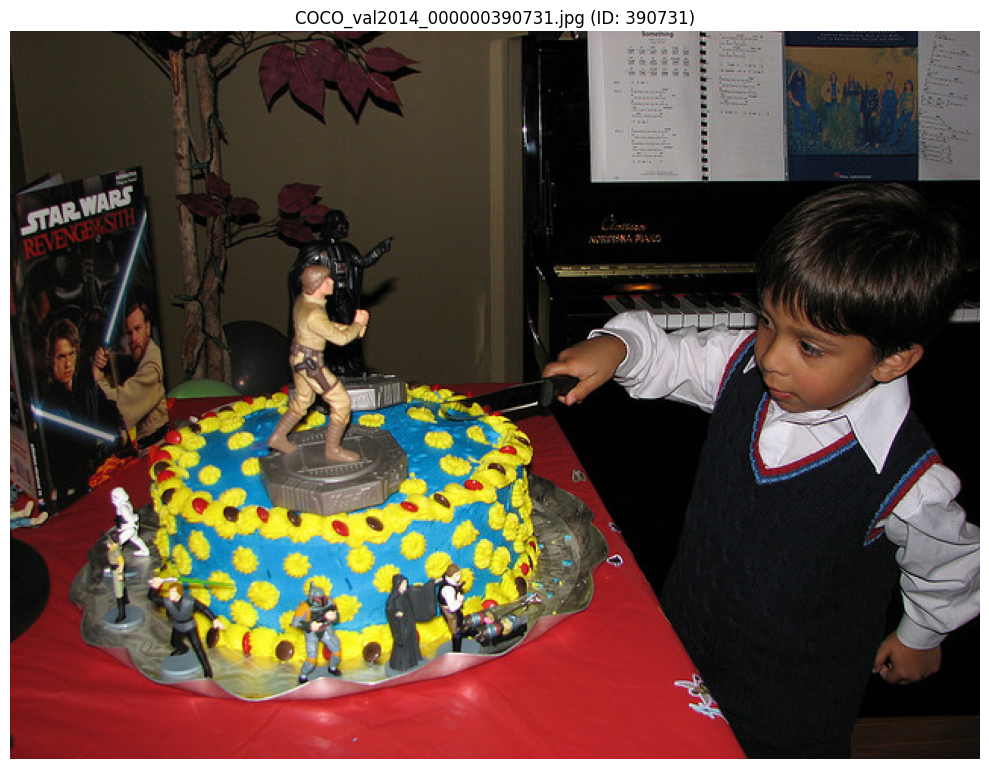

Image: COCO_val2014_000000390731.jpg
Size: 640x480


In [6]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt

def show_annotation(image_id):
    # Load image info
    coco = json.load(open("/home/research/workspace/data/raw/coco/annotations/instances_val2014.json"))
    img_info = next((img for img in coco['images'] if img['id'] == image_id), None)
    
    if not img_info:
        print(f"Image {image_id} not found!")
        return
    
    # Load image
    img_path = f"/home/research/workspace/data/raw/coco/images/val2014/{img_info['file_name']}"
    img = Image.open(img_path)
    
    # Show
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{img_info['file_name']} (ID: {image_id})")
    plt.tight_layout()
    plt.show()
    
    print(f"Image: {img_info['file_name']}")
    print(f"Size: {img_info['width']}x{img_info['height']}")

show_annotation(390731)
